In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [4]:
def eval_met(y_actual, y_predicted, model_name, results):
    accuracy = accuracy_score(y_actual, y_predicted)
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': confusion_matrix(y_actual, y_predicted).tolist(),
        'Classification Report': classification_report(y_actual, y_predicted, output_dict=True)
    }
    print(f"{model_name} Accuracy score: {accuracy}")
    print(f"{model_name} Confusion matrix:\n{confusion_matrix(y_actual, y_predicted)}")
    print(f"{model_name} Classification report:\n{classification_report(y_actual, y_predicted)}")

In [5]:
# Load dataset
df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Nora/Naive-Bayes-Classification-Data.csv")

In [6]:
# Data exploration
print(df.head(10))

   glucose  bloodpressure  diabetes
0       40             85         0
1       40             92         0
2       45             63         1
3       45             80         0
4       40             73         1
5       45             82         0
6       40             85         0
7       30             63         1
8       65             65         1
9       45             82         0


In [7]:
df.shape

(995, 3)

In [8]:
print(df.isnull().sum())

glucose          0
bloodpressure    0
diabetes         0
dtype: int64


In [9]:
df.columns

Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [11]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [13]:
print(df.describe([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98]))

          glucose  bloodpressure    diabetes
count  995.000000     995.000000  995.000000
mean    44.306533      79.184925    0.500503
std      6.707567       9.340204    0.500251
min     20.000000      50.000000    0.000000
10%     35.000000      67.000000    0.000000
20%     40.000000      70.000000    0.000000
30%     40.000000      73.000000    0.000000
50%     45.000000      80.000000    1.000000
60%     45.000000      83.000000    1.000000
70%     45.000000      85.000000    1.000000
80%     50.000000      88.000000    1.000000
90%     50.000000      90.000000    1.000000
98%     60.000000      95.000000    1.000000
max     70.000000     100.000000    1.000000


In [14]:
print(df.corr())

                glucose  bloodpressure  diabetes
glucose        1.000000      -0.164553  0.031585
bloodpressure -0.164553       1.000000 -0.808303
diabetes       0.031585      -0.808303  1.000000


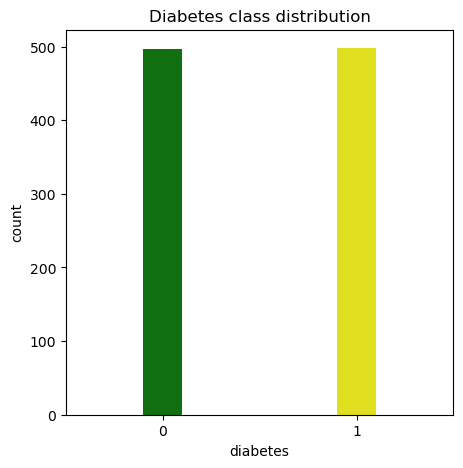

In [15]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='diabetes', width=.2, palette=['green', 'yellow'])
plt.title("Diabetes class distribution")
plt.show()

In [16]:
 #Split dataset
X = df.drop(columns='diabetes')
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [17]:
# Initialize results dictionary
results = {}


In [18]:

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
eval_met(y_test, y_pred_nb, 'Naive Bayes', results)

Naive Bayes Accuracy score: 0.949748743718593
Naive Bayes Confusion matrix:
[[95  3]
 [ 7 94]]
Naive Bayes Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        98
           1       0.97      0.93      0.95       101

    accuracy                           0.95       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.95      0.95      0.95       199



In [19]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
eval_met(y_test, y_pred_svm, 'SVM', results)


SVM Accuracy score: 0.9346733668341709
SVM Confusion matrix:
[[95  3]
 [10 91]]
SVM Classification report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.90      0.93       101

    accuracy                           0.93       199
   macro avg       0.94      0.94      0.93       199
weighted avg       0.94      0.93      0.93       199



In [20]:

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_class = np.where(y_pred_lr > 0.5, 1, 0)  # Convert predictions to binary class
eval_met(y_test, y_pred_lr_class, 'Linear Regression', results)
results['Linear Regression']['Mean Absolute Error'] = mean_absolute_error(y_test, y_pred_lr)

Linear Regression Accuracy score: 0.9246231155778895
Linear Regression Confusion matrix:
[[95  3]
 [12 89]]
Linear Regression Classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        98
           1       0.97      0.88      0.92       101

    accuracy                           0.92       199
   macro avg       0.93      0.93      0.92       199
weighted avg       0.93      0.92      0.92       199



In [21]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
eval_met(y_test, y_pred_dt, 'Decision Tree', results)

Decision Tree Accuracy score: 0.9346733668341709
Decision Tree Confusion matrix:
[[95  3]
 [10 91]]
Decision Tree Classification report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.90      0.93       101

    accuracy                           0.93       199
   macro avg       0.94      0.94      0.93       199
weighted avg       0.94      0.93      0.93       199



In [22]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
eval_met(y_test, y_pred_rf, 'Random Forest', results)

Random Forest Accuracy score: 0.9346733668341709
Random Forest Confusion matrix:
[[95  3]
 [10 91]]
Random Forest Classification report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.90      0.93       101

    accuracy                           0.93       199
   macro avg       0.94      0.94      0.93       199
weighted avg       0.94      0.93      0.93       199



In [23]:

# Standardize the data for PCA and Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
eval_met(y_test, y_pred_log_reg, 'Logistic Regression', results)

Logistic Regression Accuracy score: 0.9346733668341709
Logistic Regression Confusion matrix:
[[95  3]
 [10 91]]
Logistic Regression Classification report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.97      0.90      0.93       101

    accuracy                           0.93       199
   macro avg       0.94      0.94      0.93       199
weighted avg       0.94      0.93      0.93       199



In [28]:

# Example prediction with Naive Bayes model
#print("Example prediction with Naive Bayes model:")
#print(nb_model.predict([[34, 25]]))


In [29]:
# Display all results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")



Naive Bayes Results:
Accuracy: 0.949748743718593
Confusion Matrix: [[95, 3], [7, 94]]
Classification Report: {'0': {'precision': 0.9313725490196079, 'recall': 0.9693877551020408, 'f1-score': 0.95, 'support': 98.0}, '1': {'precision': 0.9690721649484536, 'recall': 0.9306930693069307, 'f1-score': 0.9494949494949495, 'support': 101.0}, 'accuracy': 0.949748743718593, 'macro avg': {'precision': 0.9502223569840307, 'recall': 0.9500404122044858, 'f1-score': 0.9497474747474748, 'support': 199.0}, 'weighted avg': {'precision': 0.9505065249432934, 'recall': 0.949748743718593, 'f1-score': 0.94974366783412, 'support': 199.0}}

SVM Results:
Accuracy: 0.9346733668341709
Confusion Matrix: [[95, 3], [10, 91]]
Classification Report: {'0': {'precision': 0.9047619047619048, 'recall': 0.9693877551020408, 'f1-score': 0.9359605911330049, 'support': 98.0}, '1': {'precision': 0.9680851063829787, 'recall': 0.900990099009901, 'f1-score': 0.9333333333333333, 'support': 101.0}, 'accuracy': 0.9346733668341709, 'm